# K-Nearest Neighbors (KNN)

The K-Nearest Neighbors (KNN) algorithm is a simple and intuitive supervised learning algorithm used for both classification and regression tasks.

In this lecture we will go over

- the idea behind KNN.
- implementing KNN using `sklearn`.
- implementing KNN on the iris dataset.


In [ ]:
 # Handeling Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## The K-Nearest Neighbors (KNN) Algorithm


KNN makes predictions by finding similar points, or "neighbors," in the training data.

__Algorithm__

1. Start with a point we'd like to predict the label for. Let's call this point $X_{new}$

2. Then look at the 'k' closest points in the training dataset to $X_{new}$. These are called $X_{new}$'s nearest neighbors.

3. Check the categories (or classes) of each of the nearest neighbors. Each neighbor "votes" for its category.

4. The category with the most votes is assigned as the predicted category for $X_{new}$.

If there's a tie between categories, we pick randomly from the tied classes.

__Note__

1. While in **classification**, the new point’s class is determined by the most vote class among its neighbors, in **regression**, the prediction can be based on the average of the neighbors' values.

## Example

Let’s illustrate this with an example. We create a simple dataset with two classes and add a test point that we want to classify.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

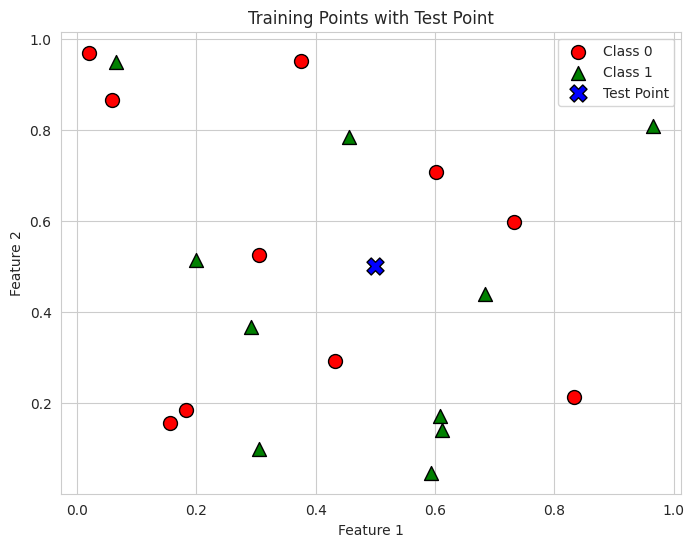

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate example data
X_train_example = np.random.rand(20, 2)  # 20 points with 2 features
y_train_example = np.array([0] * 10 + [1] * 10)  # 0 = red, 1 = green

# Define a test point
test_point = np.array([[0.5, 0.5]])

# Plot the training points along with the test point
plt.figure(figsize=(8, 6))
for idx, color, marker in zip([0, 1], ['red', 'green'], ['o', '^']):
    plt.scatter(X_train_example[y_train_example == idx, 0],
                X_train_example[y_train_example == idx, 1],
                color=color, label=f"Class {idx}", marker=marker, s=100, edgecolor='k')

# Plot the test point
plt.scatter(test_point[:, 0], test_point[:, 1], color='blue', label="Test Point", marker='X', s=150, edgecolor='k')

plt.title("Training Points with Test Point")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


We’ll initialize the KNN model, set k=4, and use it to predict the class of our test point by finding its 4 nearest neighbors. We'll visualize the connections to these neighbors and display the predicted class.

In [ ]:
# Initialize the KNN model
knn_example = KNeighborsClassifier(n_neighbors=4)

# Train the model on the example data
knn_example.fit(X_train_example, y_train_example)

# Get distances and indices of 4 nearest neighbors
distances, neighbors_idx = knn_example.kneighbors(test_point)

# Predict the class of the test point
predicted_class = knn_example.predict(test_point)
print(f"The predicted class for the test point is: {predicted_class[0]}")


The predicted class for the test point is: 0


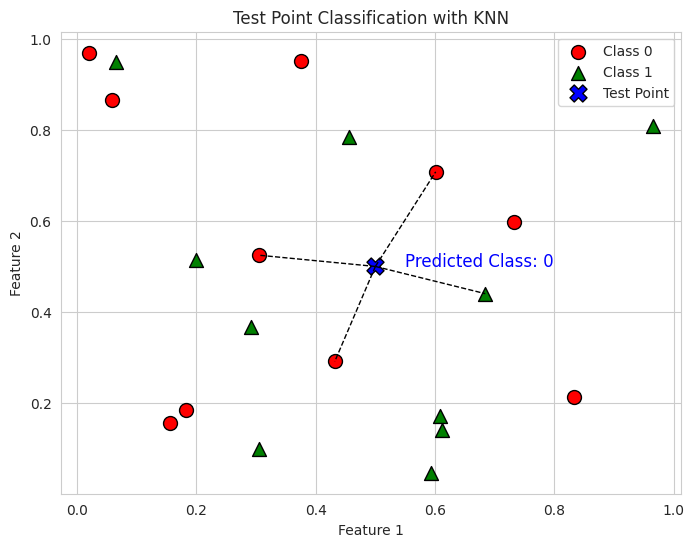

In [ ]:
# Plot the training points, test point, and neighbors with the prediction label
plt.figure(figsize=(8, 6))
for idx, color, marker in zip([0, 1], ['red', 'green'], ['o', '^']):
    plt.scatter(X_train_example[y_train_example == idx, 0],
                X_train_example[y_train_example == idx, 1],
                color=color, label=f"Class {idx}", marker=marker, s=100, edgecolor='k')

# Plot the test point, now colored according to its predicted class
plt.scatter(test_point[:, 0], test_point[:, 1], color='blue', label="Test Point", marker='X', s=150, edgecolor='k')

# Highlight the nearest neighbors by connecting them to the test point
for neighbor in neighbors_idx[0]:
    plt.plot([test_point[0, 0], X_train_example[neighbor, 0]],
             [test_point[0, 1], X_train_example[neighbor, 1]], 'k--', lw=1)

# Annotate the prediction
plt.text(test_point[0, 0] + 0.05, test_point[0, 1], f"Predicted Class: {predicted_class[0]}", color='blue', fontsize=12)

plt.title("Test Point Classification with KNN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In some cases, we don't just want to know which class the algorithm predicts for a test point. Instead, we might want to know the probability that a point belongs to each possible class. In kNN, this probability is calculated by checking the fraction of nearest neighbors that belong to each class.

For example, if k=4 and out of the 4 nearest neighbors, 3 belong to Class 1 and 1 belongs to Class 0, then:

__The probability for Class 1 =__  $3/4=0.75$.

__The probability for Class 0=__  $1/4=0.25$.

Let's see this in code using the predict_proba function from sklearn.



In [ ]:
# Get the classification probabilities
probabilities = knn_example.predict_proba(test_point)
print(f"Classification probabilities for the test point: {probabilities[0]}")

Classification probabilities for the test point: [0.75 0.25]


## KNN on Iris

__Your turn__

Let's say we want to predict the species of a new plant based on its characteristics (e.g., height, leaf color). By observing the species of nearby plants (neighbors) with similar characteristics, we can make an informed guess about the new plant's species.

We will be using the famous iris-dataset:

Each observation represents an iris (a type of flower) and gives it's measurements including:

__sepal_length:__ the length of the iris's sepal in cm.

__sepal_width:__ the width of the iris's sepal in cm.

__petal_length:__ the length of the iris's petal in cm.

__petal_width:__ the width of the iris's petal in cm.

iris_class: the class of the iris, can be:
0 meaning it is a __setosa iris__
1 meaning it is a __versicolor iris__
2 meaning it is a __virginica iris__

You can find more information about it here:

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [ ]:
## to get the iris data
from sklearn.datasets import load_iris

## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'],columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

In [ ]:
# Display a few rows of the dataset
iris_df.sample(5)


,sepal_length,sepal_width,petal_length,petal_width,iris_class
15,5.7,4.4,1.5,0.4,0
9,4.9,3.1,1.5,0.1,0
115,6.4,3.2,5.3,2.3,2
78,6.0,2.9,4.5,1.5,1
66,5.6,3.0,4.5,1.5,1


In [ ]:
# Creating a stratified train-test split
# To be consistent with the following plot code,
## name the train and test data as `iris_train` and `iris_test`, respectively.
from sklearn.model_selection import train_test_split


In [ ]:
# print the first few rows

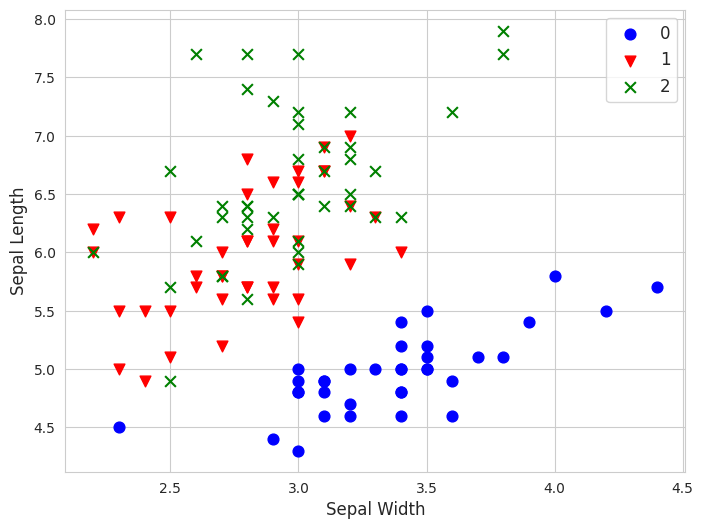

In [ ]:
## Plotting the training data

# Set the figure size for the plot
plt.figure(figsize=(8,6))

# Plot data points for Class 0 (color: blue, shape: circle)
plt.scatter(iris_train.loc[iris_train.iris_class==0].sepal_width,
            iris_train.loc[iris_train.iris_class==0].sepal_length,
            c='blue',       # Color for class 0
            s=60,           # Size of points
            label="0")      # Label for the legend

# Plot data points for Class 1 (color: orange, shape: triangle)
plt.scatter(iris_train.loc[iris_train.iris_class==1].sepal_width,
            iris_train.loc[iris_train.iris_class==1].sepal_length,
            c='red',     # Color for class 1
            s=60,           # Size of points
            marker='v',     # Shape for class 1 (triangle)
            label="1")      # Label for the legend

# Plot data points for Class 2 (color: green, shape: x)
plt.scatter(iris_train.loc[iris_train.iris_class==2].sepal_width,
            iris_train.loc[iris_train.iris_class==2].sepal_length,
            c='green',      # Color for class 2
            s=60,           # Size of points
            marker='x',     # Shape for class 2 (cross)
            label="2")      # Label for the legend

# Set font size for x and y tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set labels for the x and y axes
plt.xlabel("Sepal Width", fontsize=12)
plt.ylabel("Sepal Length", fontsize=12)

# Display the legend with specified font size
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [ ]:
#Standardize your features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Initialize the KNN model with 3 neighbors (You can choose different values of K)


# Train the model



KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the test set

In [ ]:
# print your predictions

In [ ]:
# Print accuracy score for train dataset

In [ ]:
# Print accuracy score for test dataset

In [ ]:
# Print and interpret the confusion Matrix

In [ ]:
# Classification Report

In [ ]:
# Get the classification probabilities on test dataset

In [ ]:
#print classification probabilities for a few test points

Congrdulationn!

